# Calculate f/H from bathymetry

### Import packages

In [1]:
import numpy as np
import xarray as xr
from netCDF4 import Dataset

### Set parameters

In [2]:
Omega = 7.292e-5  # radians/second

### Open dataset

In [3]:
ds = xr.open_dataset('bathy.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 558, lon: 700)
Coordinates:
  * lat      (lat) float64 -84.19 -84.16 -84.14 -84.11 ... -30.47 -30.26 -30.04
  * lon      (lon) float64 -84.88 -84.62 -84.38 -84.12 ... 89.38 89.62 89.88
Data variables:
    bathy    (lat, lon) float64 ...
    draft    (lat, lon) float64 ...
    omask    (lat, lon) float64 ...
    imask    (lat, lon) float64 ...

### Plot ocean mask and ice shelf mask

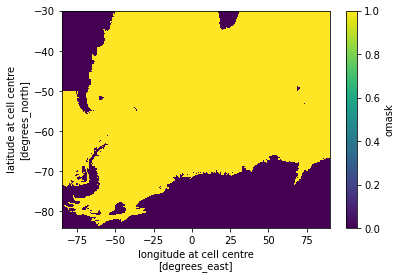

In [4]:
ds.omask.plot()

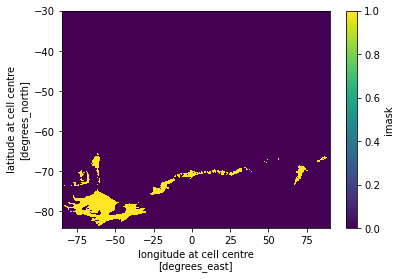

In [5]:
ds.imask.plot()

### Calculate f/H

In [6]:
# save the Omega parameter in the Dataset for reference 
ds['Omega'] = Omega

# calculate f, add to Dataset
ds['f'] = 2*Omega*np.sin(ds.lat*np.pi/180)

# calculate f/H using a masked array (only calculate f/H in the open ocean)
ds['f_over_H'] = ds.f/np.abs(ds.bathy.where((ds.omask == 1.0) & (ds.imask == 0.0)))
ds

<xarray.Dataset>
Dimensions:   (lat: 558, lon: 700)
Coordinates:
  * lat       (lat) float64 -84.19 -84.16 -84.14 -84.11 ... -30.47 -30.26 -30.04
  * lon       (lon) float64 -84.88 -84.62 -84.38 -84.12 ... 89.38 89.62 89.88
Data variables:
    bathy     (lat, lon) float64 ...
    draft     (lat, lon) float64 ...
    omask     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0
    imask     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Omega     float64 7.292e-05
    f         (lat) float64 -0.0001451 -0.0001451 ... -7.348e-05 -7.301e-05
    f_over_H  (lat, lon) float64 nan nan nan ... -3.811e-08 -3.28e-08 -3.134e-08

### Visualise f/H

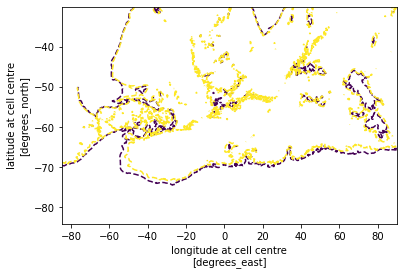

In [28]:
#ds.f_over_H.plot.contour(levels=np.arange(-5.0e-8,0.0))
ds.f_over_H.plot.contour(levels=(-6.0e-8, -4.0e-8))

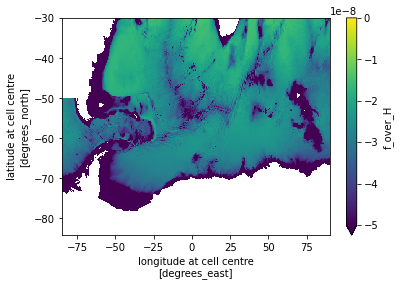

In [9]:
ds.f_over_H.plot(vmin=-5e-8, vmax=0.0)

### Save new Dataset to NetCDF file

In [ ]:
#ds.to_netcdf('bathy_with_fH.nc')